<a href="https://colab.research.google.com/github/chanducpu/Predicting_Number/blob/main/Predicting_Number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#List of Library

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvny
import seaborn as sns

In [ ]:
def accuracy(y,y_hat):
  return(np.mean(y==y_hat))

# Loading the data(Traning)

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Bayesian Inference/MNIST_train.csv")
df.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.iloc[:,28].unique()

array([0])

In [ ]:
df.iloc[:,31].unique()

array([0])

In [ ]:
df.iloc[1,:]

,1
Unnamed: 0,1
index,1
labels,0
0,0
1,0
...,...
779,0
780,0
781,0
782,0


In [ ]:
df.shape

(60000, 787)

#Understading the Data

In [ ]:
df.drop(["Unnamed: 0","index"],axis=1,inplace=True)


In [ ]:
X=df.drop("labels",axis=1)
y=df["labels"]

In [ ]:
X_image=X.iloc[56].values.reshape(28,28)

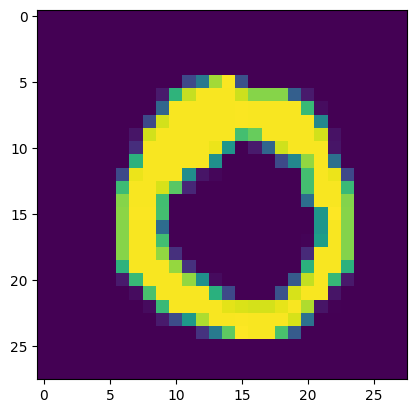

In [ ]:
plt.imshow(X_image)

In [ ]:
type(y.shape)

tuple

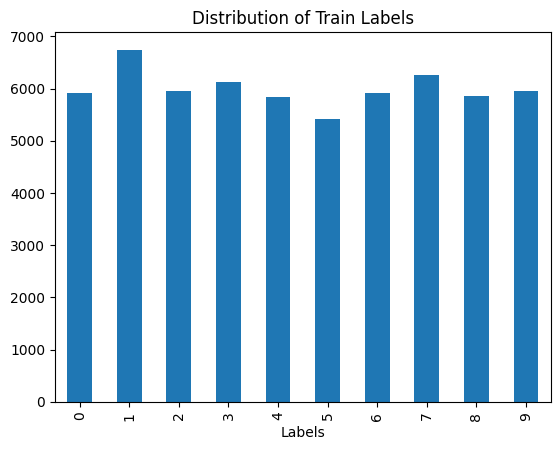

In [ ]:
y.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Labels")
plt.title("Distribution of Train Labels")
plt.show()


In [ ]:
def classification(row):
  if row > 192:
    return "White"
  elif row > 128 :
    return "L_gray"
  elif row > 64 :
    return "D_gray"
  else:
    return "Black"

In [ ]:
X=X.applymap(classification)

<ipython-input-16-f6fa9212a319>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X=X.applymap(classification)


In [ ]:
test=pd.read_csv("/content/drive/MyDrive/Bayesian Inference/MNIST_test.csv")
test.drop(["Unnamed: 0","index"],axis=1,inplace=True)
X_test=test.drop("labels",axis=1)
y_test=test['labels']

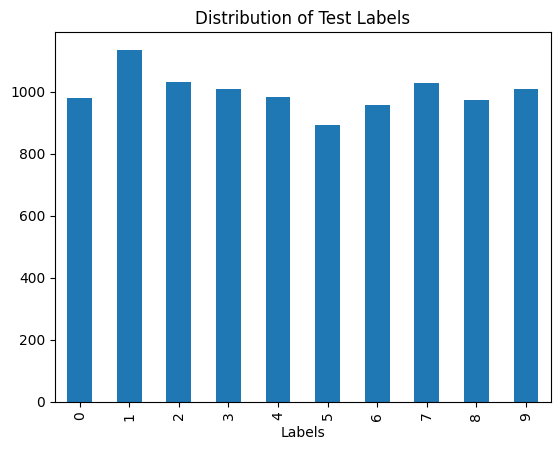

In [ ]:
y_test.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Labels")
plt.title("Distribution of Test Labels")
plt.show()

In [ ]:
X_test=X_test.applymap(classification)

<ipython-input-19-12560e2af73f>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test=X_test.applymap(classification)


#Navie Bayes Probabilities

In [ ]:
class NB():
  def fit(self, X, y, epsilon=1e-3):
      self.priors = dict()
      self.epsilon=epsilon
      self.K = set(y.astype(int))
      self.cat_likelihoods = dict()

      for k in self.K:
        X_k = X[y == k]
        self.priors[k] = len(X_k) / len(X)
        self.cat_likelihoods[k] = dict()
        for col in X.columns:
            self.cat_likelihoods[k][col] = X_k[col].value_counts(normalize=True).to_dict()

  def predict(self, X):
    N, D = X.shape
    P_hat = np.zeros((N, len(self.K)))
    for idx, k in enumerate(self.K):
      log_prob = np.log(self.priors[k])
      for col in X.columns:
          cat_probs = self.cat_likelihoods[k].get(col, {})
          log_prob += np.log(X[col].map(cat_probs).fillna(self.epsilon))
          P_hat[:, idx] = log_prob
    return P_hat.argmax(axis=1)

In [ ]:
NB=NB()
NB.fit(X,y)

#The Accuracy of Train Nayie Bayes Probability

In [ ]:
y_hat=NB.predict(X)
accuracy(y,y_hat)

np.float64(0.8381)

#The Accuracy of Test Nayie Bayes Probability

In [ ]:
y_hat_test=NB.predict(X_test)
accuracy(y_test,y_hat_test)

np.float64(0.8467)

In [ ]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,Black,Black,Black,Black,Black,Black,Black,Black,Black,Black,...,Black,Black,Black,Black,Black,Black,Black,Black,Black,Black
1,Black,Black,Black,Black,Black,Black,Black,Black,Black,Black,...,Black,Black,Black,Black,Black,Black,Black,Black,Black,Black
2,Black,Black,Black,Black,Black,Black,Black,Black,Black,Black,...,Black,Black,Black,Black,Black,Black,Black,Black,Black,Black
3,Black,Black,Black,Black,Black,Black,Black,Black,Black,Black,...,Black,Black,Black,Black,Black,Black,Black,Black,Black,Black
4,Black,Black,Black,Black,Black,Black,Black,Black,Black,Black,...,Black,Black,Black,Black,Black,Black,Black,Black,Black,Black



# The Gaussian Navi Bayes


In [ ]:
class GaussNB():
  def fit(self, X, y, epsilon=1e-3):
      self.likelihoods = dict()
      self.priors = dict()
      self.K = set(y.astype(int))
      for k in self.K:
        X_k = X[y == k]
        self.priors[k] = len(X_k) / len(X)
        self.likelihoods[k] = dict()
        for col in X.columns:
            self.likelihoods[k][col] = {"mean": X_k[col].mean(axis=0),"sd": X_k[col].std(axis=0) + epsilon}

  def predict(self, X):
    N, D = X.shape
    P_hat = np.zeros((N, len(self.K)))
    for idx, k in enumerate(self.K):
      log_prob = np.log(self.priors[k])
      for col in X.columns:
          mean, sd = self.likelihoods[k][col]["mean"], self.likelihoods[k][col]["sd"]
          log_prob += mvny.logpdf(X[col], mean, sd)
      P_hat[:, idx] = log_prob
    return P_hat.argmax(axis=1)

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Bayesian Inference/MNIST_train.csv")
df.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Gaussian Navi data directly

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Bayesian Inference/MNIST_train.csv")
df.drop(["Unnamed: 0","index"],axis=1,inplace=True)
X=df.drop("labels",axis=1)
y=df["labels"]

In [ ]:
test=pd.read_csv("/content/drive/MyDrive/Bayesian Inference/MNIST_test.csv")
test.drop(["Unnamed: 0","index"],axis=1,inplace=True)
X_test=test.drop("labels",axis=1)
y_test=test['labels']

In [ ]:
guss=GaussNB()
guss.fit(X,y)

#Train

In [ ]:
y_hat=guss.predict(X)
accuracy(y,y_hat)

np.float64(0.8439)

#Test

In [ ]:
y_hat_test=guss.predict(X_test)
y_GN_D=accuracy(y_test,y_hat_test)

In [ ]:
y_GN_D

np.float64(0.8484)

#Gaussian Navi Bayes WHen data is Divided By 255

In [ ]:
X=X/255
X_test=X_test/255

In [ ]:
guss=GaussNB()
guss.fit(X,y)

#Train

In [ ]:
y_hat=guss.predict(X)
accuracy(y,y_hat)

np.float64(0.40158333333333335)

#Test

In [ ]:
y_hat_test=guss.predict(X_test)
y_GN_255=accuracy(y_test,y_hat_test)

In [ ]:
y_GN_255

np.float64(0.4068)

#Gaussian Navi Bayes WHen data is MinMax Scaling

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Bayesian Inference/MNIST_train.csv")
df.drop(["Unnamed: 0","index"],axis=1,inplace=True)
X=df.drop("labels",axis=1)
y=df["labels"]

In [ ]:
test=pd.read_csv("/content/drive/MyDrive/Bayesian Inference/MNIST_test.csv")
test.drop(["Unnamed: 0","index"],axis=1,inplace=True)
X_test=test.drop("labels",axis=1)
y_test=test['labels']

In [ ]:
X=(X-X.min())/((X.max()-X.min())+1)
X_test=(X_test-X_test.min())/((X_test.max()-X_test.min())+1)

In [ ]:
guss=GaussNB()
guss.fit(X,y)

#Train

In [ ]:
y_hat=guss.predict(X)
accuracy(y,y_hat)

np.float64(0.40131666666666665)

#Test

In [ ]:
y_hat_test=guss.predict(X_test)
y_GN_Sc=accuracy(y_test,y_hat_test)

In [ ]:
y_GN_Sc

np.float64(0.4061)

#The Non_Gaussian Navi Bayes

In [ ]:
class Non_GaussBayes():
    def fit(self, X, y, epsilon=1e-1/2):
        self.likelihoods = dict()
        self.priors = dict()
        self.K = set(y.astype(int))
        self.cat_likelihoods = dict()
        self.epsilon=epsilon

        for k in self.K:
            X_k = X[y == k]
            N_k, D = X_k.shape
            col_name = X.columns
            mu_k = X_k[col_name].mean(axis=0)
            cov_k = (1 / (N_k - 1)) * np.matmul((X_k[col_name] - mu_k).T, (X_k[col_name] - mu_k))
            cov_k += epsilon * np.identity(len(col_name))
            self.likelihoods[k] = {"mean": mu_k, "cov": cov_k}
            self.priors[k] = len(X_k) / len(X)

    def predict(self, X):
        N, D = X.shape
        P_hat = np.zeros((N, len(self.K)))
        col_name = X.columns
        for k in self.K:
            log_prob = np.log(self.priors[k])
            mean, cov = self.likelihoods[k]["mean"], self.likelihoods[k]["cov"]
            log_prob += mvny.logpdf(X[col_name], mean, cov)
            P_hat[:, k] = log_prob

        return P_hat.argmax(axis=1)


#The Non_Gaussian Navi Bayes ,with Direct Data

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Bayesian Inference/MNIST_train.csv")
df.drop(["Unnamed: 0","index"],axis=1,inplace=True)
X=df.drop("labels",axis=1)
y=df["labels"]

In [ ]:
test=pd.read_csv("/content/drive/MyDrive/Bayesian Inference/MNIST_test.csv")
test.drop(["Unnamed: 0","index"],axis=1,inplace=True)
X_test=test.drop("labels",axis=1)
y_test=test['labels']

In [ ]:
Non_guss=Non_GaussBayes()
Non_guss.fit(X,y)

#Train

In [ ]:
y_hat=Non_guss.predict(X)
accuracy(y,y_hat)

np.float64(0.8293666666666667)

#Test

In [ ]:
y_hat_test=Non_guss.predict(X_test)
y_NGN_D=accuracy(y_test,y_hat_test)

In [ ]:
y_NGN_D

np.float64(0.8006)

#The Non_Gaussian Navi Bayes WHen data is Divied by 255

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Bayesian Inference/MNIST_train.csv")
df.drop(["Unnamed: 0","index"],axis=1,inplace=True)
X=df.drop("labels",axis=1)
y=df["labels"]

In [ ]:
test=pd.read_csv("/content/drive/MyDrive/Bayesian Inference/MNIST_test.csv")
test.drop(["Unnamed: 0","index"],axis=1,inplace=True)
X_test=test.drop("labels",axis=1)
y_test=test['labels']

In [ ]:
X=X/255
X_test=X_test/255

In [ ]:
Non_guss=Non_GaussBayes()
Non_guss.fit(X,y)

#Train

In [ ]:
y_hat=Non_guss.predict(X)
accuracy(y,y_hat)

np.float64(0.9592)

#Test

In [ ]:
y_hat_test=Non_guss.predict(X_test)
y_NGN_255=accuracy(y_test,y_hat_test)

In [ ]:
y_NGN_255

np.float64(0.9563)

#The Non_Gaussian Navi Bayes WHen data is MinMax Scaling

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Bayesian Inference/MNIST_train.csv")
df.drop(["Unnamed: 0","index"],axis=1,inplace=True)
X=df.drop("labels",axis=1)
y=df["labels"]

In [ ]:
test=pd.read_csv("/content/drive/MyDrive/Bayesian Inference/MNIST_test.csv")
test.drop(["Unnamed: 0","index"],axis=1,inplace=True)
X_test=test.drop("labels",axis=1)
y_test=test['labels']

In [ ]:
X=(X-X.min())/((X.max()-X.min())+1)
X_test=(X_test-X_test.min())/((X_test.max()-X_test.min())+1)

In [ ]:
Non_guss=Non_GaussBayes()
Non_guss.fit(X,y)

#Train

In [ ]:
y_hat=Non_guss.predict(X)
accuracy(y,y_hat)

np.float64(0.95915)

#Test

In [ ]:
y_hat_test=Non_guss.predict(X_test)
y_NGN_SC=accuracy(y_test,y_hat_test)

In [ ]:
y_NGN_SC

np.float64(0.9564)

#Confusion Matrix of Training

Text(0.5, 47.7222222222222, 'Predicted label')

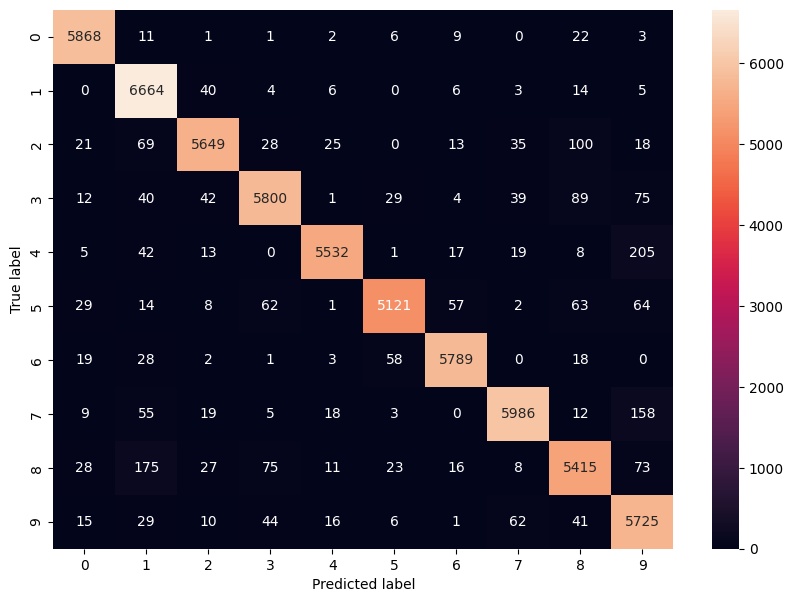

In [ ]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(y_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Confusion Matrix of Test

Text(0.5, 47.7222222222222, 'Predicted label')

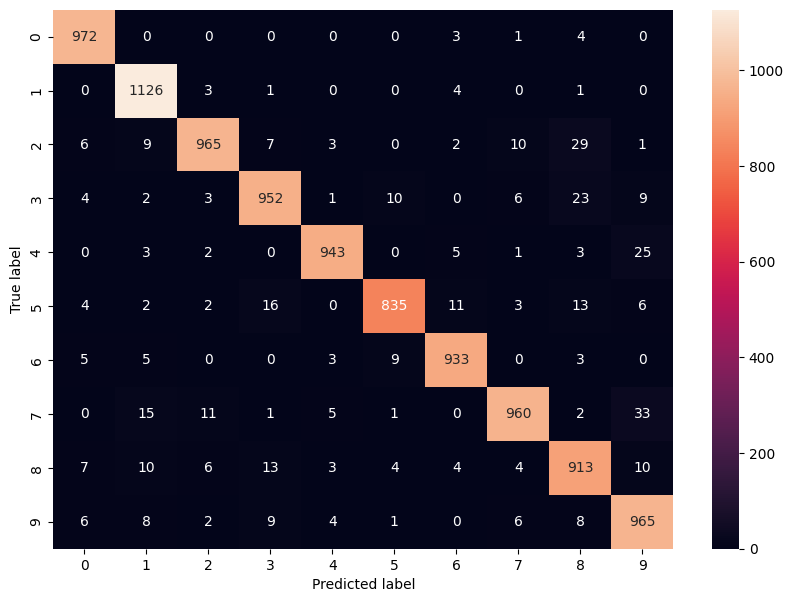

In [ ]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_hat_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Checking the Labels Mistake only For False Predictions

In [ ]:
test['prediction']=y_hat_test

In [ ]:
test.head()

,labels,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,prediction
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [ ]:
False_predictions=test[test['prediction']!=test['labels']]

In [ ]:
False_predictions

,labels,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,prediction
73,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
80,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
111,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
151,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
175,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9905,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
9914,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
9943,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
9944,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [ ]:
X_F=False_predictions.drop(["labels","prediction"],axis=1)

In [ ]:
AC=False_predictions["labels"]
PC=False_predictions["prediction"]



In [ ]:
X_F

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
73,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_F.iloc[0,:].values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

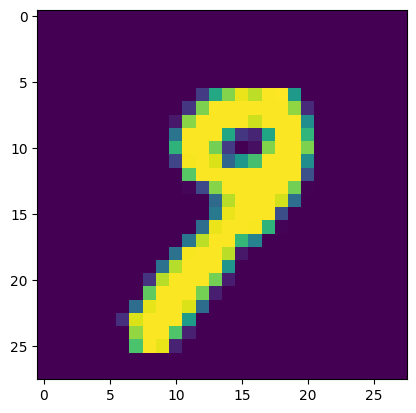

In [ ]:
plt.imshow(X_F.iloc[0,:].values.reshape(28,28))

In [ ]:
AC.iloc[0]

np.int64(9)

In [ ]:
X_F.shape

(436, 784)

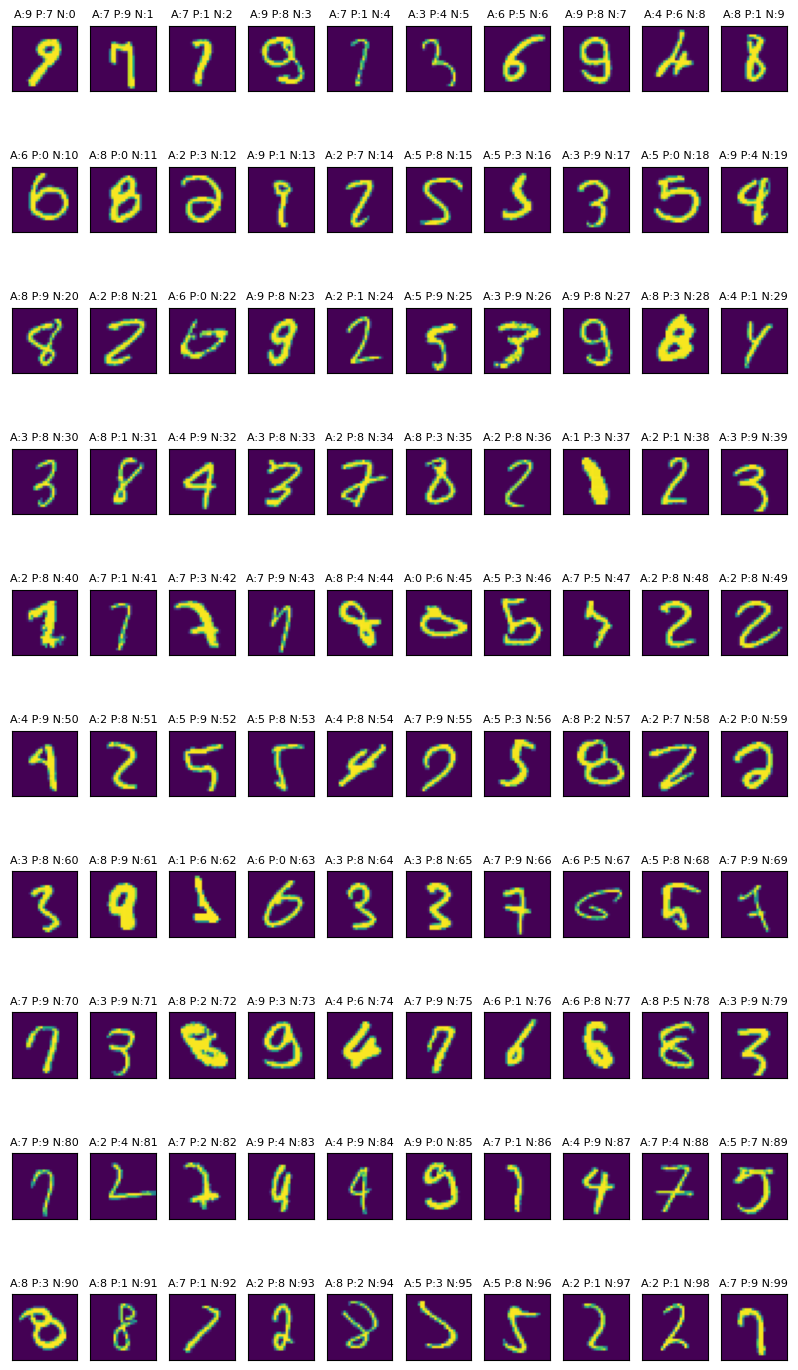

In [ ]:
figure, axis = plt.subplots(10, 10,figsize=(10,18))
for x in range(100):
  col=x%10
  row=x//10
  axis[row,col].imshow(X_F.iloc[x,:].values.reshape(28,28))
  axis[row,col].set_title(f'A:{AC.iloc[x]} P:{PC.iloc[x]} N:{x}',fontsize = 8)
  axis[row,col].get_xaxis().set_visible(False)
  axis[row,col].get_yaxis().set_visible(False)

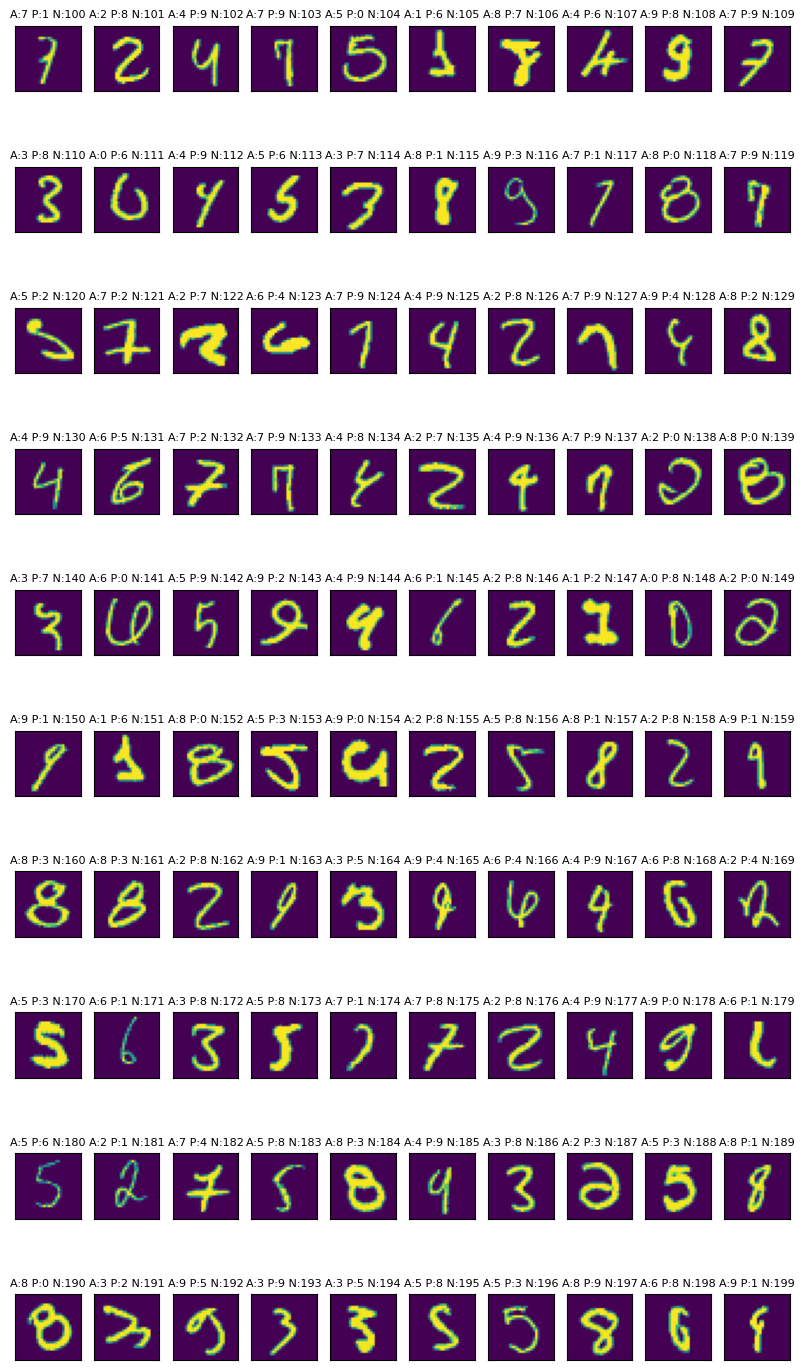

In [ ]:
figure, axis = plt.subplots(10, 10,figsize=(10,18))
for x in range(100):
  col=x%10
  row=x//10
  x=x+100
  axis[row,col].imshow(X_F.iloc[x,:].values.reshape(28,28))
  axis[row,col].set_title(f'A:{AC.iloc[x]} P:{PC.iloc[x]} N:{x}',fontsize = 8)
  axis[row,col].get_xaxis().set_visible(False)
  axis[row,col].get_yaxis().set_visible(False)

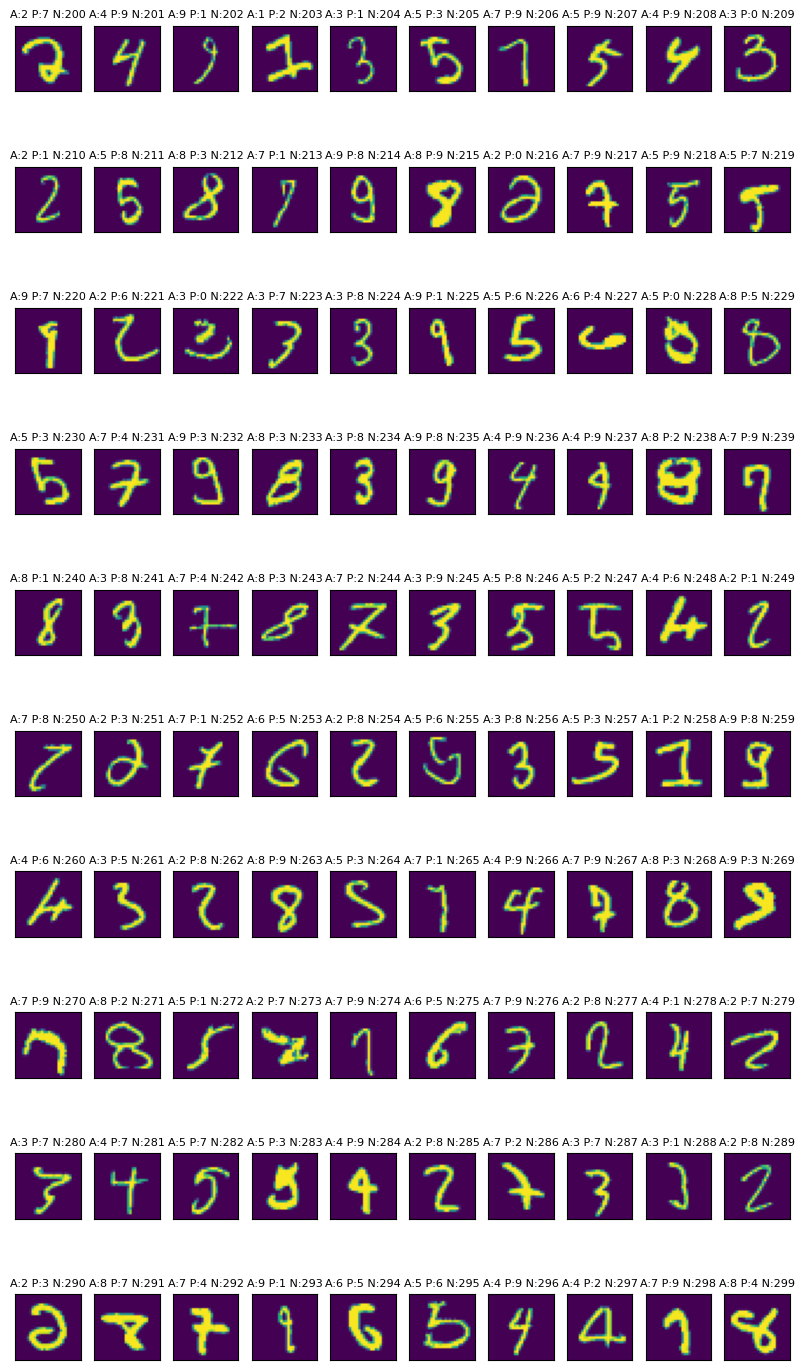

In [ ]:
figure, axis = plt.subplots(10, 10,figsize=(10,18))
for x in range(100):
  col=x%10
  row=x//10
  x=x+200
  axis[row,col].imshow(X_F.iloc[x,:].values.reshape(28,28))
  axis[row,col].set_title(f'A:{AC.iloc[x]} P:{PC.iloc[x]} N:{x}',fontsize = 8)
  axis[row,col].get_xaxis().set_visible(False)
  axis[row,col].get_yaxis().set_visible(False)

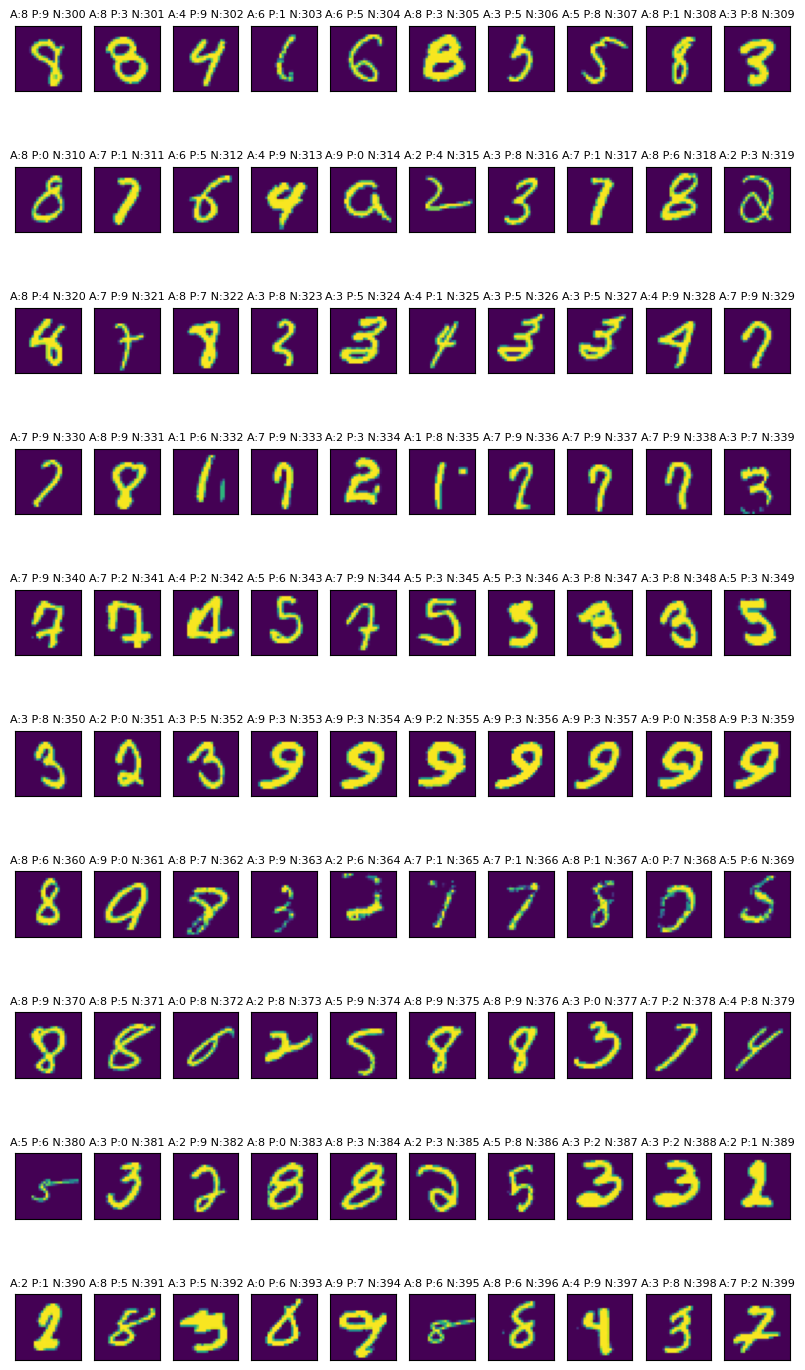

In [ ]:
figure, axis = plt.subplots(10, 10,figsize=(10,18))
for x in range(100):
  col=x%10
  row=x//10
  x=x+300
  axis[row,col].imshow(X_F.iloc[x,:].values.reshape(28,28))
  axis[row,col].set_title(f'A:{AC.iloc[x]} P:{PC.iloc[x]} N:{x}',fontsize = 8)
  axis[row,col].get_xaxis().set_visible(False)
  axis[row,col].get_yaxis().set_visible(False)

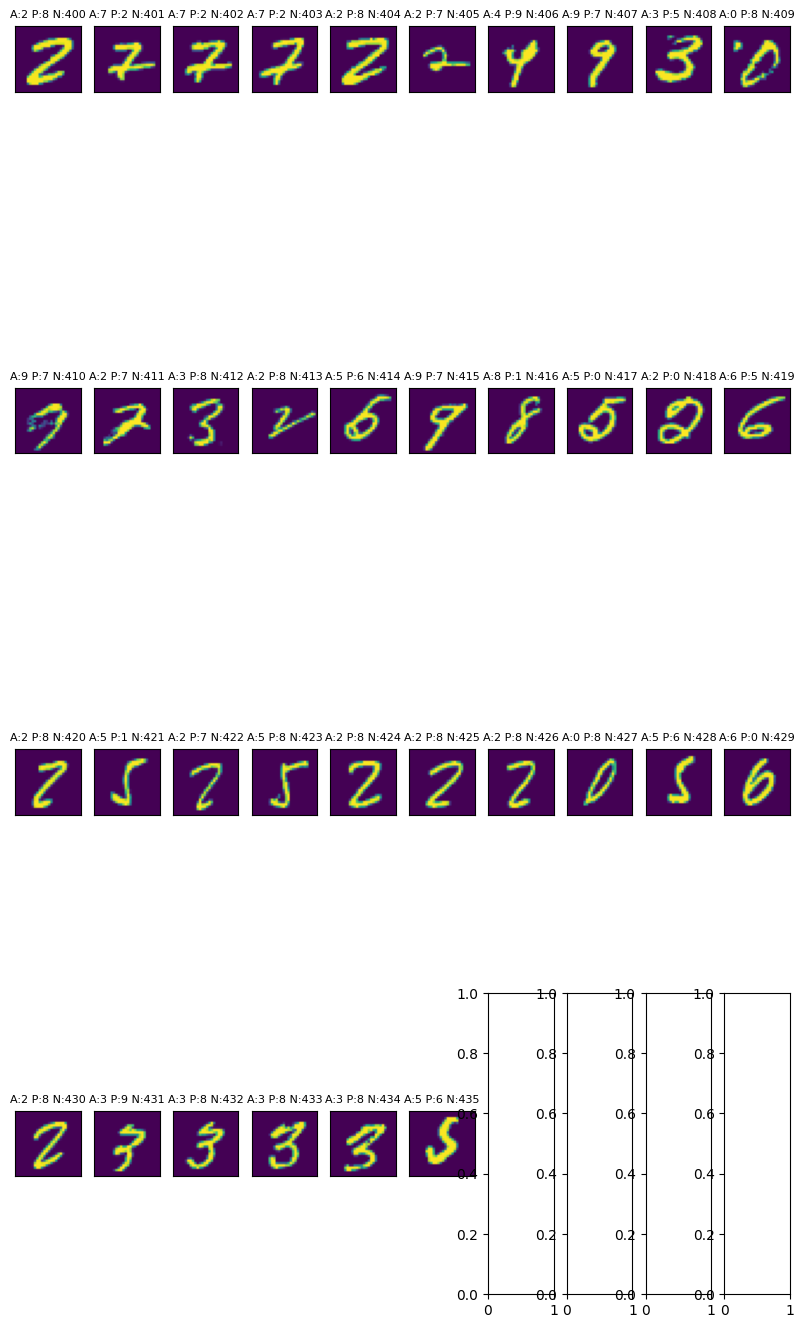

In [ ]:
figure, axis = plt.subplots(4,10,figsize=(10,18))
for x in range(36):
  col=x%10
  row=x//10
  x=x+400
  axis[row,col].imshow(X_F.iloc[x,:].values.reshape(28,28))
  axis[row,col].set_title(f'A:{AC.iloc[x]} P:{PC.iloc[x]} N:{x}',fontsize = 8)
  axis[row,col].get_xaxis().set_visible(False)
  axis[row,col].get_yaxis().set_visible(False)